In [1]:
import sys, os
import numpy as np
import pandas as pd
import photoz_utils
import random
import h5py
import matplotlib.pyplot as plt
from astropy.io import fits
from tqdm import tqdm

In [2]:
photozdata = pd.read_csv('/data/HSC/HSC_v6/HSC_v6.csv')
photozdata.describe()

b = np.argsort(photozdata['object_id'])
sorted_photozdata = photozdata.iloc[b][:]
photozdata = sorted_photozdata

In [3]:
for (columnName, columnData) in photozdata.iteritems():
    print(columnName)

object_id
specz_redshift_err
specz_redshift
specz_mag_i
specz_name
specz_ra
specz_dec
specz_flag_homogeneous
ra
dec
coord
skymap_id
g_cmodel_mag
r_cmodel_mag
i_cmodel_mag
z_cmodel_mag
y_cmodel_mag
g_cmodel_magsigma
r_cmodel_magsigma
i_cmodel_magsigma
z_cmodel_magsigma
y_cmodel_magsigma


/tmp/ipykernel_3180726/3463937130.py:1: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (columnName, columnData) in photozdata.iteritems():


In [4]:
hf_original = h5py.File('/data/HSC/HSC_v6/step2A/127x127/legacy/five_band_image127x127_with_metadata_corrected.hdf5', 'r')
object_id_original = np.asarray(hf_original['object_id'])[..., None]
size = len(object_id_original)

start_index = (127 - 64) // 2
end_index = start_index + 64

In [6]:
# key = np.random.randint(0, 100000)
key = 34217
print(key)

34217


In [7]:
np.random.seed(key)

In [8]:
ntrain = 10000
ntest = 2000
nval = 2000

In [9]:
# indices = random.sample(list(np.arange(size)), ntrain + ntest + nval)

In [10]:
# np.save('datasplit_indices_small.npy', indices)

In [ ]:
# indices = np.load('datasplit_indices_small.npy')

In [11]:
inds_train = np.sort(indices[: ntrain])
inds_test = np.sort(indices[ntrain : ntrain + ntest])
inds_val = np.sort(indices[ntrain + ntest :])

In [12]:
hf_split = h5py.File('/data/HSC/HSC_v6/temp/64x64/5x64x64.hdf5', 'r')

In [13]:
subsizes = [ntrain, ntest, nval]
file_ends = ['_training_small', '_testing_small', '_validation_small']
inds_list = [inds_train, inds_test, inds_val]

for subsize, file_end, inds in zip(subsizes, file_ends, inds_list):
    hf_write = h5py.File('/data/HSC/HSC_v6/temp/64x64/5x64x64' + file_end + '.hdf5', 'w')
    for k in hf_split.keys():
        tmp = hf_split[k]
        subshape = list(np.shape(tmp))
        subshape[0] = subsize
        dataset = hf_write.create_dataset(k, shape = subshape, dtype = tmp.dtype)
        for i, index in tqdm(enumerate(inds)):
            dataset[i] = tmp[index]
        tmp = None

hf_split.close()
hf_write.close()

10000it [01:44, 95.80it/s]
10000it [00:11, 835.96it/s]
10000it [00:15, 647.52it/s]
10000it [00:12, 804.09it/s]
10000it [00:03, 2623.21it/s]
10000it [00:01, 5654.92it/s]
10000it [01:27, 114.52it/s]
10000it [00:12, 815.02it/s] 
10000it [00:00, 16859.98it/s]
10000it [00:00, 17970.99it/s]
10000it [00:07, 1284.29it/s]
10000it [00:00, 15782.36it/s]
10000it [00:14, 705.22it/s]
10000it [00:02, 4184.30it/s]
10000it [00:16, 594.00it/s]
10000it [00:01, 6942.38it/s]
10000it [00:00, 18422.10it/s]
10000it [00:06, 1624.64it/s]
10000it [00:00, 10752.18it/s]
10000it [00:00, 17076.80it/s]
10000it [00:03, 2822.44it/s]
10000it [00:00, 15435.78it/s]
10000it [00:00, 19056.02it/s]
2000it [00:07, 265.47it/s]
2000it [00:00, 2298.13it/s]
2000it [00:01, 1837.68it/s]
2000it [00:00, 2039.25it/s]
2000it [00:00, 13025.14it/s]
2000it [00:00, 8323.02it/s]
2000it [00:19, 100.69it/s]
2000it [00:01, 1916.10it/s]
2000it [00:00, 15425.17it/s]
2000it [00:00, 17939.29it/s]
2000it [00:00, 7743.70it/s]
2000it [00:00, 18157.20i

In [14]:
hf_split = h5py.File('/data/HSC/HSC_v6/temp/127x127/5x127x127.hdf5', 'r')

In [15]:
subsizes = [ntrain, ntest, nval]
file_ends = ['_training_small', '_testing_small', '_validation_small']
inds_list = [inds_train, inds_test, inds_val]

for subsize, file_end, inds in zip(subsizes, file_ends, inds_list):
    hf_write = h5py.File('/data/HSC/HSC_v6/temp/127x127/5x127x127' + file_end + '.hdf5', 'w')
    for k in hf_split.keys():
        tmp = hf_split[k]
        subshape = list(np.shape(tmp))
        subshape[0] = subsize
        dataset = hf_write.create_dataset(k, shape = subshape, dtype = tmp.dtype)
        for i, index in tqdm(enumerate(inds)):
            dataset[i] = tmp[index]
        tmp = None

hf_split.close()
hf_write.close()

10000it [00:00, 13416.83it/s]
10000it [00:00, 20501.51it/s]
10000it [00:00, 23314.80it/s]
10000it [00:00, 21340.31it/s]
10000it [00:00, 22550.14it/s]
10000it [00:00, 22535.31it/s]
10000it [02:27, 68.00it/s]
10000it [00:00, 20544.21it/s]
10000it [00:00, 22690.88it/s]
10000it [00:00, 21627.94it/s]
10000it [00:00, 21549.42it/s]
10000it [00:00, 21408.25it/s]
10000it [00:00, 21544.19it/s]
10000it [00:00, 12995.42it/s]
10000it [00:00, 22372.81it/s]
10000it [00:00, 13856.53it/s]
10000it [00:00, 10025.38it/s]
10000it [00:01, 6890.79it/s]
10000it [00:00, 10962.99it/s]
10000it [00:00, 22579.64it/s]
10000it [00:00, 22124.41it/s]
10000it [00:00, 22680.42it/s]
10000it [00:00, 22890.80it/s]
2000it [00:00, 14600.72it/s]
2000it [00:00, 22553.96it/s]
2000it [00:00, 22706.03it/s]
2000it [00:00, 22750.56it/s]
2000it [00:00, 22723.56it/s]
2000it [00:00, 22591.01it/s]
2000it [00:27, 72.92it/s]
2000it [00:00, 18517.04it/s]
2000it [00:00, 22744.82it/s]
2000it [00:00, 22756.11it/s]
2000it [00:00, 22618.61it/s

In [16]:
hf_train_64 = h5py.File('/data/HSC/HSC_v6/temp/64x64/5x64x64_training_small.hdf5', 'r')
hf_train_127 = h5py.File('/data/HSC/HSC_v6/temp/127x127/5x127x127_training_small.hdf5', 'r')

In [17]:
# Check data maching
for (columnName, columnData) in tqdm(photozdata.iteritems()):
    # print(np.asarray(hf_original[columnName])[..., None][0:2])
    for i in range(0, 10):
        if np.asarray(hf_train_64[columnName])[..., None][i] != np.asarray(hf_train_127[columnName])[..., None][i]:
            print('error')

0it [00:00, ?it/s]/opt/anaconda3/envs/jupyterhub/lib/python3.10/site-packages/tqdm/std.py:1182: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for obj in iterable:
22it [00:00, 335.69it/s]


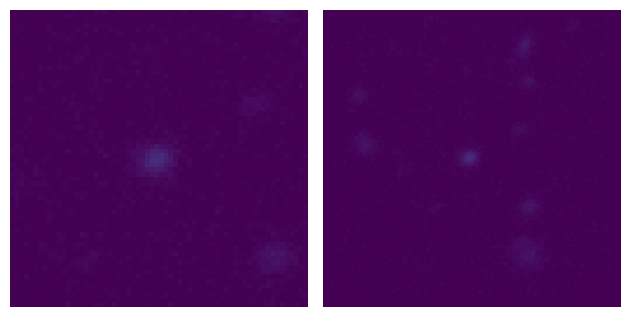

In [18]:
# Check image maching
index_to_show = 400
fig, axes = plt.subplots(1, 2)  # 1 row, 2 columns

axes[0].imshow(hf_train_64['image'][index_to_show][0], vmin = 0, vmax = 4.16)
axes[0].axis('off')

axes[1].imshow(hf_train_127['image'][index_to_show][0], vmin = 0, vmax = 4.16)
axes[1].axis('off')

plt.tight_layout()
plt.show()

22it [00:00, 364.58it/s]


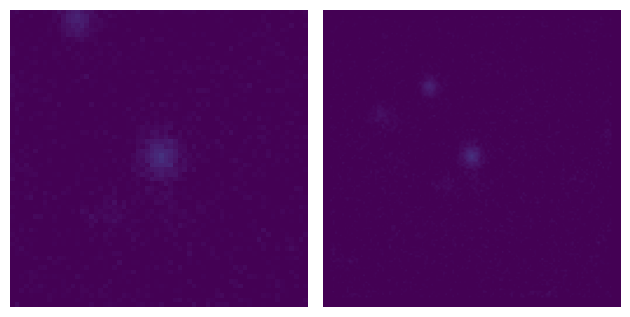

In [21]:
hf_test_64 = h5py.File('/data/HSC/HSC_v6/temp/64x64/5x64x64_testing_small.hdf5', 'r')
hf_test_127 = h5py.File('/data/HSC/HSC_v6/temp/127x127/5x127x127_testing_small.hdf5', 'r')

# Check data maching
for (columnName, columnData) in tqdm(photozdata.iteritems()):
    # print(np.asarray(hf_original[columnName])[..., None][0:2])
    for i in range(0, 10):
        if np.asarray(hf_test_64[columnName])[..., None][i] != np.asarray(hf_test_127[columnName])[..., None][i]:
            print('error')
            
# Check image maching
index_to_show = 400
fig, axes = plt.subplots(1, 2)  # 1 row, 2 columns

axes[0].imshow(hf_test_64['image'][index_to_show][0], vmin = 0, vmax = 4.16)
axes[0].axis('off')

axes[1].imshow(hf_test_127['image'][index_to_show][0], vmin = 0, vmax = 4.16)
axes[1].axis('off')

plt.tight_layout()
plt.show()

22it [00:00, 381.18it/s]


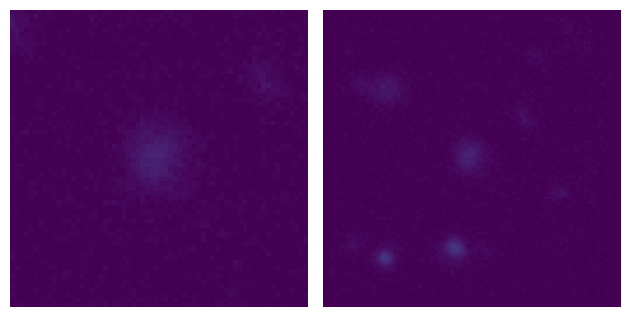

In [22]:
hf_val_64 = h5py.File('/data/HSC/HSC_v6/temp/64x64/5x64x64_validation_small.hdf5', 'r')
hf_val_127 = h5py.File('/data/HSC/HSC_v6/temp/127x127/5x127x127_validation_small.hdf5', 'r')

# Check data maching
for (columnName, columnData) in tqdm(photozdata.iteritems()):
    # print(np.asarray(hf_original[columnName])[..., None][0:2])
    for i in range(0, 10):
        if np.asarray(hf_val_64[columnName])[..., None][i] != np.asarray(hf_val_127[columnName])[..., None][i]:
            print('error')
            
# Check image maching
index_to_show = 400
fig, axes = plt.subplots(1, 2)  # 1 row, 2 columns

axes[0].imshow(hf_val_64['image'][index_to_show][0], vmin = 0, vmax = 4.16)
axes[0].axis('off')

axes[1].imshow(hf_val_127['image'][index_to_show][0], vmin = 0, vmax = 4.16)
axes[1].axis('off')

plt.tight_layout()
plt.show()

In [23]:
# Check metadata
hf_val_64 = h5py.File('/data/HSC/HSC_v6/temp/64x64/5x64x64_validation_small.hdf5', 'r')
hf_val_127 = h5py.File('/data/HSC/HSC_v6/temp/127x127/5x127x127_validation_small.hdf5', 'r')

for i in [random.randint(0, nval) for _ in range(10)]:
    print(i)
    object_id_64 = np.asarray(hf_val_64['object_id'][0:])[..., None][i][0]
    object_id_127 = np.asarray(hf_val_127['object_id'][0:])[..., None][i][0]
    for j in range(len(photozdata['object_id'])):
        if photozdata['object_id'][j] == object_id_64:
            if photozdata['object_id'][j] != object_id_64:
                print('error')
            for (columnName, columnData) in photozdata.iteritems():
                if columnName == 'specz_name' or columnName == 'coord': 
                    if np.asarray(photozdata[columnName][j]).astype('S') != np.asarray(hf_val_64[columnName][0:])[..., None][i][0]:
                        print('error')
                    if np.asarray(photozdata[columnName][j]).astype('S') != np.asarray(hf_val_127[columnName][0:])[..., None][i][0]:
                        print('error')
                else:
                    if photozdata[columnName][j] != np.asarray(hf_val_64[columnName][0:])[..., None][i][0]:
                        print('error')
                    if photozdata[columnName][j] != np.asarray(hf_val_127[columnName][0:])[..., None][i][0]:
                        print('error')

1214


/tmp/ipykernel_3180726/1824593901.py:13: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (columnName, columnData) in photozdata.iteritems():


995
1786
441
1143
326
175
174
1256
635


In [24]:
# Check metadata
hf_test_64 = h5py.File('/data/HSC/HSC_v6/temp/64x64/5x64x64_testing_small.hdf5', 'r')
hf_test_127 = h5py.File('/data/HSC/HSC_v6/temp/127x127/5x127x127_testing_small.hdf5', 'r')

for i in [random.randint(0, ntest) for _ in range(10)]:
    print(i)
    object_id_64 = np.asarray(hf_test_64['object_id'][0:])[..., None][i][0]
    object_id_127 = np.asarray(hf_test_127['object_id'][0:])[..., None][i][0]
    for j in range(len(photozdata['object_id'])):
        if photozdata['object_id'][j] == object_id_64:
            if photozdata['object_id'][j] != object_id_64:
                print('error')
            for (columnName, columnData) in photozdata.iteritems():
                if columnName == 'specz_name' or columnName == 'coord': 
                    if np.asarray(photozdata[columnName][j]).astype('S') != np.asarray(hf_test_64[columnName][0:])[..., None][i][0]:
                        print('error')
                    if np.asarray(photozdata[columnName][j]).astype('S') != np.asarray(hf_test_127[columnName][0:])[..., None][i][0]:
                        print('error')
                else:
                    if photozdata[columnName][j] != np.asarray(hf_test_64[columnName][0:])[..., None][i][0]:
                        print('error')
                    if photozdata[columnName][j] != np.asarray(hf_test_127[columnName][0:])[..., None][i][0]:
                        print('error')

33


/tmp/ipykernel_3180726/2081428329.py:13: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (columnName, columnData) in photozdata.iteritems():


346
1113
1283
78
1175
365
393
1472
1426


In [25]:
# Check metadata
hf_train_64 = h5py.File('/data/HSC/HSC_v6/temp/64x64/5x64x64_training_small.hdf5', 'r')
hf_train_127 = h5py.File('/data/HSC/HSC_v6/temp/127x127/5x127x127_training_small.hdf5', 'r')

for i in [random.randint(0, ntrain) for _ in range(10)]:
    print(i)
    object_id_64 = np.asarray(hf_train_64['object_id'][0:])[..., None][i][0]
    object_id_127 = np.asarray(hf_train_127['object_id'][0:])[..., None][i][0]
    for j in range(len(photozdata['object_id'])):
        if photozdata['object_id'][j] == object_id_64:
            if photozdata['object_id'][j] != object_id_64:
                print('error')
            for (columnName, columnData) in photozdata.iteritems():
                if columnName == 'specz_name' or columnName == 'coord': 
                    if np.asarray(photozdata[columnName][j]).astype('S') != np.asarray(hf_train_64[columnName][0:])[..., None][i][0]:
                        print('error')
                    if np.asarray(photozdata[columnName][j]).astype('S') != np.asarray(hf_train_127[columnName][0:])[..., None][i][0]:
                        print('error')
                else:
                    if photozdata[columnName][j] != np.asarray(hf_train_64[columnName][0:])[..., None][i][0]:
                        print('error')
                    if photozdata[columnName][j] != np.asarray(hf_train_127[columnName][0:])[..., None][i][0]:
                        print('error')

6814


/tmp/ipykernel_3180726/2300915987.py:13: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (columnName, columnData) in photozdata.iteritems():


4598
456
1474
3384
3178
3884
8185
622
9397


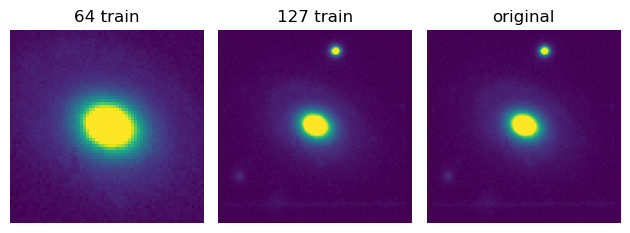

In [26]:
# Check image
hf_original = h5py.File('/data/HSC/HSC_v6/step2A/127x127/legacy/five_band_image127x127_with_metadata_corrected.hdf5', 'r')
object_id_original = np.asarray(hf_original['object_id'])[..., None]

i = random.randint(0, ntrain)

object_id_64 = np.asarray(hf_train_64['object_id'][0:])[..., None][i][0]
object_id_127 = np.asarray(hf_train_127['object_id'][0:])[..., None][i][0]

for j in range(len(object_id_original)):
    if object_id_original[j] == object_id_64:
        if object_id_original[j] != object_id_127:
            print('error')
        original_index = j

fig, axes = plt.subplots(1, 3)  # 1 row, 2 columns

axes[0].imshow(hf_train_64['image'][i][0], vmin = 0, vmax = 4.16)
axes[0].set_title('64 train')
axes[0].axis('off')

axes[1].imshow(hf_train_127['image'][i][0], vmin = 0, vmax = 4.16)
axes[1].set_title('127 train')
axes[1].axis('off')

axes[2].imshow(hf_original['image'][original_index][0], vmin = 0, vmax = 4.16)
axes[2].set_title('original')
axes[2].axis('off')

plt.tight_layout()
plt.show()

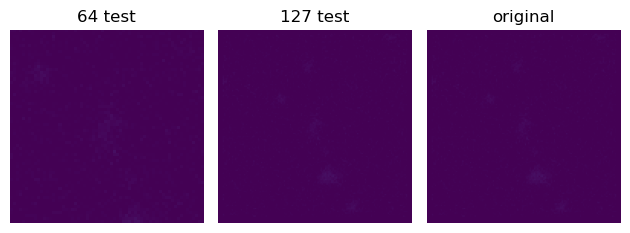

In [27]:
# Check image
hf_original = h5py.File('/data/HSC/HSC_v6/step2A/127x127/legacy/five_band_image127x127_with_metadata_corrected.hdf5', 'r')
object_id_original = np.asarray(hf_original['object_id'])[..., None]

i = random.randint(0, ntest)

object_id_64 = np.asarray(hf_test_64['object_id'][0:])[..., None][i][0]
object_id_127 = np.asarray(hf_test_127['object_id'][0:])[..., None][i][0]

for j in range(len(object_id_original)):
    if object_id_original[j] == object_id_64:
        if object_id_original[j] != object_id_127:
            print('error')
        original_index = j

fig, axes = plt.subplots(1, 3)  # 1 row, 2 columns

axes[0].imshow(hf_test_64['image'][i][0], vmin = 0, vmax = 4.16)
axes[0].set_title('64 test')
axes[0].axis('off')

axes[1].imshow(hf_test_127['image'][i][0], vmin = 0, vmax = 4.16)
axes[1].set_title('127 test')
axes[1].axis('off')

axes[2].imshow(hf_original['image'][original_index][0], vmin = 0, vmax = 4.16)
axes[2].set_title('original')
axes[2].axis('off')

plt.tight_layout()
plt.show()

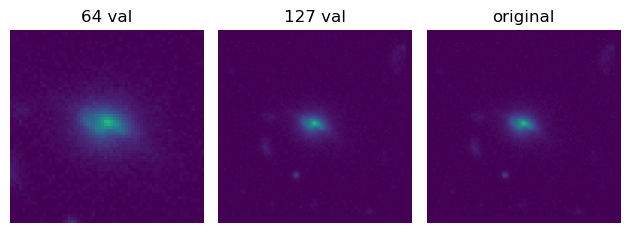

In [28]:
# Check image
hf_original = h5py.File('/data/HSC/HSC_v6/step2A/127x127/legacy/five_band_image127x127_with_metadata_corrected.hdf5', 'r')
object_id_original = np.asarray(hf_original['object_id'])[..., None]

i = random.randint(0, nval)

object_id_64 = np.asarray(hf_val_64['object_id'][0:])[..., None][i][0]
object_id_127 = np.asarray(hf_val_127['object_id'][0:])[..., None][i][0]

for j in range(len(object_id_original)):
    if object_id_original[j] == object_id_64:
        if object_id_original[j] != object_id_127:
            print('error')
        original_index = j

fig, axes = plt.subplots(1, 3)  # 1 row, 2 columns

axes[0].imshow(hf_val_64['image'][i][0], vmin = 0, vmax = 4.16)
axes[0].set_title('64 val')
axes[0].axis('off')

axes[1].imshow(hf_val_127['image'][i][0], vmin = 0, vmax = 4.16)
axes[1].set_title('127 val')
axes[1].axis('off')

axes[2].imshow(hf_original['image'][original_index][0], vmin = 0, vmax = 4.16)
axes[2].set_title('original')
axes[2].axis('off')

plt.tight_layout()
plt.show()

In [29]:
hf_original.close()
hf_train_64.close()
hf_train_127.close()
hf_test_64.close()
hf_test_127.close()
hf_val_64.close()
hf_val_127.close()

In [ ]:
# END